## **AIF-P06: 로지스틱회귀**

- 팀번호:
- 참여팀원명:
- 불참팀원명:

- 특징 중에서 sepal length, sepal width, petal width만을 사용함.
- IRIS dataset (150개) 중에 105개는 학습용, 45개는 테스용으로 사용함.
  - train_test_split()함수에서 random_state=42로 고정함.

#### **1. Iris dataset을 읽고, correlation matrix 계산 및 그림으로 그림**

(1) Feature names =  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(2) Target names =  ['setosa' 'versicolor' 'virginica']
(3) Correlation matrix 계산
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)               1.00             -0.12               0.87   
sepal width (cm)               -0.12              1.00              -0.43   
petal length (cm)               0.87             -0.43               1.00   
petal width (cm)                0.82             -0.37               0.96   

                   petal width (cm)  
sepal length (cm)              0.82  
sepal width (cm)              -0.37  
petal length (cm)              0.96  
petal width (cm)               1.00  
(4) Correlation matrix를 seaborn plot 그림


<function matplotlib.pyplot.show(close=None, block=None)>

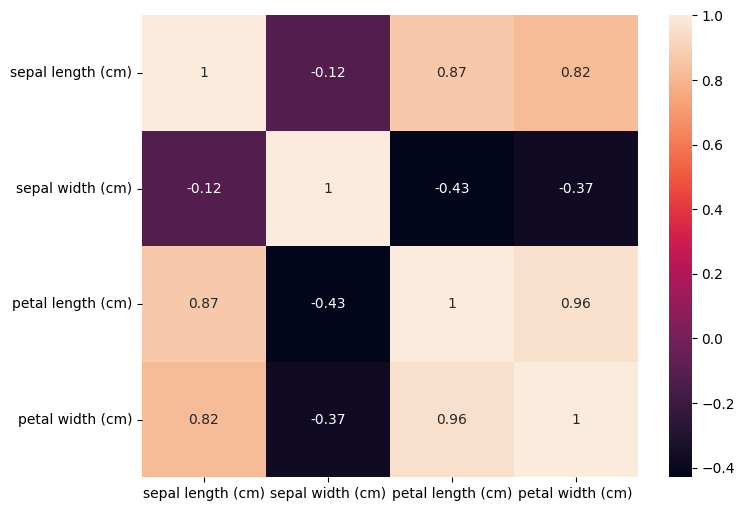

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# iris dataset 읽기
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

print('(1) Feature names = ', iris.feature_names)
print('(2) Target names = ', iris.target_names)
print('(3) Correlation matrix 계산')
correlation = iris_df.corr().round(2)
print(correlation)
# 아래에 코드 작성

print('(4) Correlation matrix를 seaborn plot 그림')
plt.figure(figsize=(8, 6))  # 플롯 크기 조정
sns.heatmap(correlation, annot = True)
plt.show
# 아래에 코드 작성

#### **2. sepal length, sepal width, petal width로 구성된 dataset 만들기**

In [55]:
X = iris.data
y = iris.target
print('\n(1): 처음 5개의 특징값들')
print(X[0:5])

# sepal length, width와 petal length로 데이터셋 구성하기
print('\n(2): sepal length, sepal width, petal width로 구성된 dataset (처음 5개)')
# 아래에 코드 작성
ax = X[:, [0, 1, 3]]
# 출력
print(ax[:5])


(1): 처음 5개의 특징값들
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

(2): sepal length, sepal width, petal width로 구성된 dataset (처음 5개)
[[5.1 3.5 0.2]
 [4.9 3.  0.2]
 [4.7 3.2 0.2]
 [4.6 3.1 0.2]
 [5.  3.6 0.2]]


#### **3. sepal length, sepal width, petal width로 구성된 dataset을 3D scatter plot그리기**

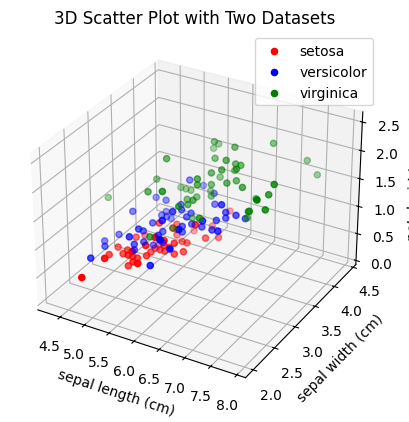

In [57]:
# 3D scatter plot으로 데이터를 시각화 하기

# 아래에 코드 작성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

data = X[:, [0, 1, 3]]
setosa = data[y == 0]
versicolor = data[y == 1]
virginica = data[y == 2]

ax.scatter(setosa[:, 0], setosa[:, 1], setosa[:, 2], color='red', label='setosa')
ax.scatter(versicolor[:, 0], versicolor[:, 1], versicolor[:, 2], color='blue', label='versicolor')
ax.scatter(virginica[:, 0], virginica[:, 1], virginica[:, 2], color='green', label='virginica')

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[3])
ax.set_title('3D Scatter Plot with Two Datasets')

# Add legend
ax.legend(loc='upper right')
# Show plot
plt.show()

#### **3. Versicolor이면 label이 0, 그렇지 않으면 label이 0이 되는 dataset을 만들기**

In [62]:
np.set_printoptions(precision=2, suppress = True)

X_train,X_test,y_train,y_test =train_test_split(X, y,
      random_state = 42, test_size=0.3)

print('(1) Labels', end = ' ')
for n in range(3):
    print(f'{iris.target_names[n]} = {n}', end=' ')
print()

print("(2) Labels in Train and test datasets ")
print('y_train = ')
print(y_train, '\n')
print('y_test = ')
print(y_test, '\n')

print(f'\n(3) New Labels: {iris.target_names[1]} = 0, others = 1')
y_train_new = y_train.copy()
# 아래에 코드 작성
y_train_new = np.where(y_train == 1, 0, 1)  # versicolor는 0, 나머지는 1
y_test_new = np.where(y_test == 1, 0, 1)

print('y_train_new = ')
print(y_train_new)

print('y_test_new = ')
print(y_test_new)

(1) Labels setosa = 0 versicolor = 1 virginica = 2 
(2) Labels in Train and test datasets 
y_train = 
[1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0
 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0] 

y_test = 
[1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 0 0] 


(3) New Labels: versicolor = 0, others = 1
y_train_new = 
[0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0
 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1]
y_test_new = 
[0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 1 1]


#### **4. sepal length, sepal width, petal width로 구성된 dataset을 이용한 로지스틱회귀 분류**
- Versicolor인지 아닌지를 구분하는 로지스틱회귀 분류기를 만들고, 분류정확도를 출력하라.

In [61]:
print(f'\n(1) Logistic regression for classification of "{iris.target_names[1]}" or not')
log_reg = LogisticRegression(random_state = 42)
# 아래에 코드 작성

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'\tTest dataset performace = {accuracy:0.4f} \n')

print(f'\n(2) 처음 10개의 X_test[0:10]를 예측 확률을 구하고, 이것을 이용해서 정확도를 계산하라.')
proba = log_reg.predict_proba(X_test[0:10])
print('proba = ', proba)
# 아래에 코드 작성
y_pred_10 = log_reg.predict(X_test[0:10])
accuracy_10 = accuracy_score(y_test[0:10], y_pred_10)

print(f'\t처음 10개 정확도 = {accuracy_10:0.4f} \n')




(1) Logistic regression for classification of "versicolor" or not
	Test dataset performace = 0.7333 


(2) 처음 10개의 X_test[0:10]를 예측 확률을 구하고, 이것을 이용해서 정확도를 계산하라.
proba =  [[0.47 0.53]
 [0.94 0.06]
 [0.41 0.59]
 [0.61 0.39]
 [0.54 0.46]
 [0.88 0.12]
 [0.66 0.34]
 [0.82 0.18]
 [0.26 0.74]
 [0.5  0.5 ]]
	처음 10개 정확도 = 0.5000 

